In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
train = pd.read_excel(io="../Desktop/essay process/random trainset.xlsx")
train = pd.DataFrame(train)
test = pd.read_excel(io="../Desktop/essay process/random testset.xlsx")
test = pd.DataFrame(test)


In [10]:
train.columns[:]

Index(['student ID', 'B14', 'B15', 'B16', 'goB14', 'goB15', 'goB16', 'weight',
       'height', 'CoughOrNot', 'FeverOrNot', 'illOrNot'],
      dtype='object')

In [7]:
train.describe()

student ID          B14          B15          B16        goB14  \
count  2900.000000  2899.000000  2900.000000  2899.000000  2900.000000   
mean   1450.500000     0.332528     0.322759     0.344257     0.354828   
std     837.302215     0.471200     0.467612     0.475207     0.478544   
min       1.000000     0.000000     0.000000     0.000000     0.000000   
25%     725.750000     0.000000     0.000000     0.000000     0.000000   
50%    1450.500000     0.000000     0.000000     0.000000     0.000000   
75%    2175.250000     1.000000     1.000000     1.000000     1.000000   
max    2900.000000     1.000000     1.000000     1.000000     1.000000   

             goB15        goB16       weight       height   CoughOrNot  \
count  2899.000000  2900.000000  2900.000000  2900.000000  2898.000000   
mean      0.329769     0.355517    60.023932   175.045862     0.333333   
std       0.470210     0.478752    10.626187     9.001186     0.471486   
min       0.000000     0.000000    40.152690   160.000000     0.000000   
25%       0.000000     0.000000    51.172967   167.000000     0.000000   
50%       0.000000     0.000000    58.933665   175.000000     0.000000   
75%       1.000000     1.000000    68.880773   183.000000     1.000000   
max       1.000000     1.000000    85.496204   190.000000     1.000000   

        FeverOrNot     illOrNot  
count  2898.000000  2900.000000  
mean      0.331608     0.333448  
std       0.470872     0.471526  
min       0.000000     0.000000  
25%       0.000000     0.000000  
50%       0.000000     0.000000  
75%       1.000000     1.000000  
max       1.000000     1.000000

In [20]:
plt.figure(figsize=(8, 6))
sns.distplot(a=np.log1p(train['height']), bins=50, kde=True)
plt.xlabel("height", fontsize=12)
plt.savefig(fname="height")

d:\python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


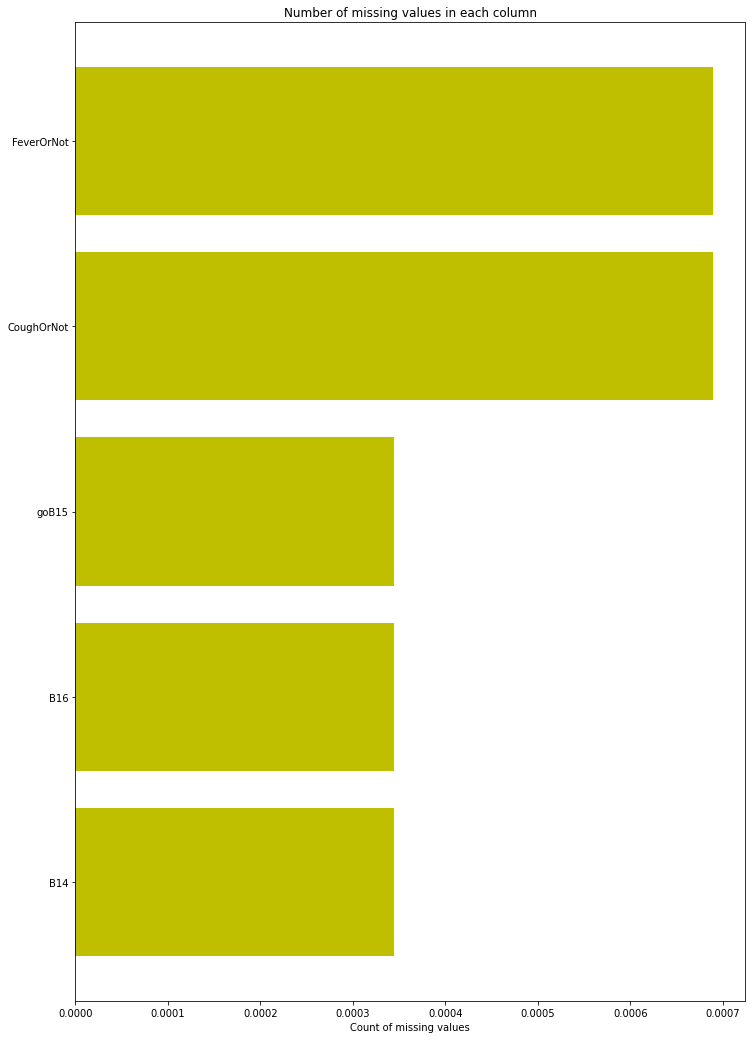

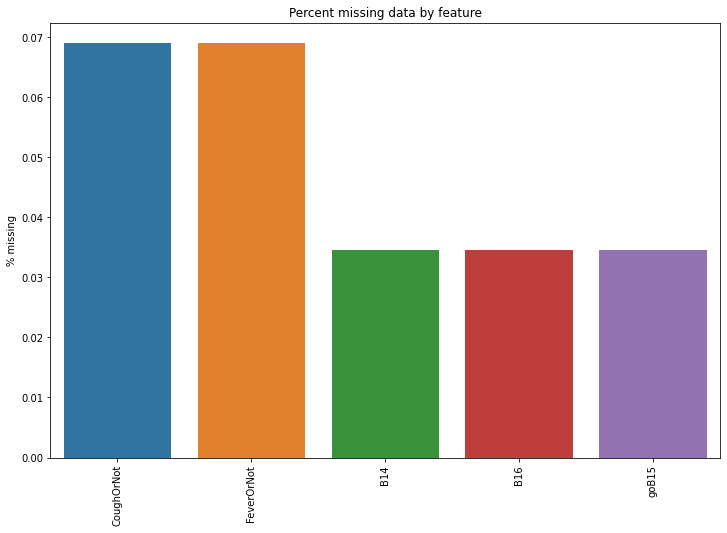

In [36]:
missing_df = (train.isnull().sum(axis=0)/train.shape[0]).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.loc[missing_df['missing_count']>0]
missing_df = missing_df.sort_values('missing_count', axis=0,  ascending=True)
width = 0.8
ind = np.arange(missing_df.shape[0])
fig, ax = plt.subplots(figsize=(12, 18))
ax.barh(ind, missing_df['missing_count'], color='y')
ax.set_yticks(ind)
ax.set_yticklabels(missing_df['column_name'], rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values in each column")
plt.savefig(fname="NA1")

train_na = (train.isnull().sum() / len(train)) * 100
train_na = train_na.drop(train_na[train_na == 0].index).sort_values(ascending=False)

f, ax = plt.subplots(figsize=(12, 8))
plt.xticks(rotation='90')
sns.barplot(x=train_na.index, y=train_na)
ax.set(title='Percent missing data by feature', ylabel='% missing')
plt.savefig(fname="NA2")

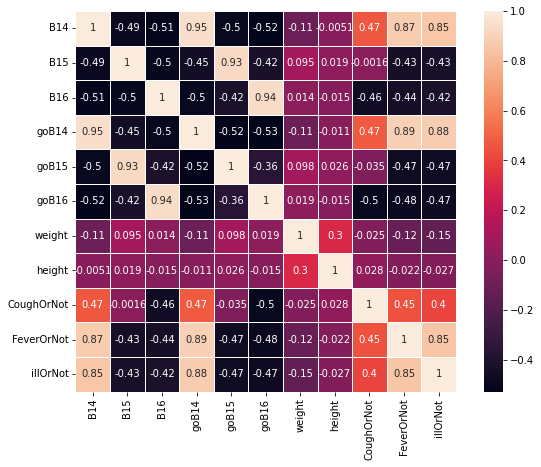

In [39]:
internal_chars = [ 'B14', 'B15', 'B16', 'goB14', 'goB15', 'goB16', 'weight',
       'height', 'CoughOrNot', 'FeverOrNot', 'illOrNot']
corrmat = train[internal_chars].corr()

f, ax = plt.subplots(figsize=(10, 7))
plt.xticks(rotation='90')
sns.heatmap(corrmat, square=True, linewidths=.5, annot=True)
plt.savefig(fname="heatmap")

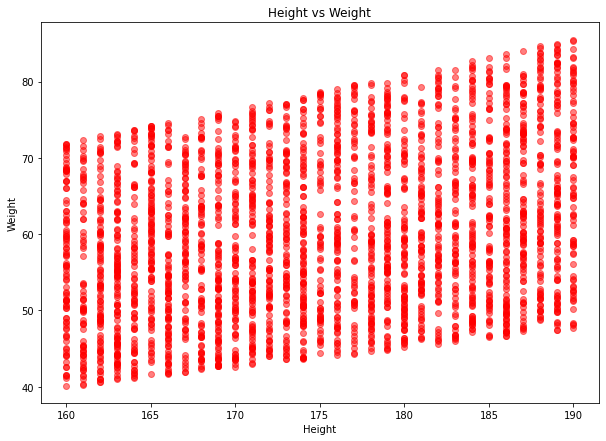

In [48]:
f, ax = plt.subplots(figsize=(10, 7))
ind = train[train['height'] > 2000].index
plt.scatter(x=train.drop(ind)['height'], y=train.drop(ind)['weight'], c='r', alpha=0.5)
ax.set(title='Height vs Weight', xlabel='Height', ylabel='Weight')
plt.savefig(fname='scatter')

In [54]:
f, ax = plt.subplots(figsize=(12, 8))
ind = train[train['illOrNot'].isnull()].index
train['height_log10'] = np.log10(train['height'])
sns.violinplot(x="illOrNot", y="height_log10", data=train.drop(ind), inner="box")
# sns.swarmplot(x="state", y="price_doc_log10", data=train_df.dropna(), color="w", alpha=.2);
ax.set(title='Log10 height vs illOrNot', xlabel='illOrNot', ylabel='log10(height)')
plt.savefig(fname='height violin')